### Librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, 
    precision_score, recall_score, balanced_accuracy_score, 
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from scipy.stats import randint, uniform

# Interpretabilidad
import shap

# Guardar modelo
import joblib


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Bases

In [2]:
# Base inicial
df_final = pd.read_csv("data/df_final.csv")
df_final['DescRF_Identificacion'] = df_final['DescRF_Identificacion'].astype(str).str.strip()

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_19200\2983733256.py:2: DtypeWarning: Columns (18,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv("C:/Users/Administrator/Downloads/df_final.csv")


### Selección de variables modelo

In [3]:
variables_utiles = [
    'DescRF_Tipo_estado_alumno', # categorica
    'DescRF_Modalidad', # categorica
    'DescRF_Semestre_SINU', # numerica
    'DescRF_ciclo', # categorica
    'DescRF_SEMESTRE_MEN', #numerica
    'DescRF_Genero', # categorica
    'DescRF_Unidad', # categorica
    'DescRF_Jornada', # categorica
    'DescRF_Tipo_Inscripcion', # categorica
    'DescRF_Sede', # categorica
    'DescRF_Regional', # categorica
    'DescRF_Programa', # categorica
    'DescRF_Fondo', # categorica
    'DescRF_Producto', # categorica
    'DescRF_Fuente', # categorica
    'DescRF_REGLA_ACA', # numerica
    'DescRF_REGLA_INGLES', # numerica
    'DescRF_perdida_academica', # numerica
    'DescRF_tiene_grado', # numerica
    'DescRF_graduado', # numerica
    'DescRF_cod_ciclo', # numerica
    'DescRF_Tipo_Alumno', # categorica
    'DescRF_Nuevo', # categorica
    'DescRF_Valor_Liquidado', # numerica
    'DescRF_Creditos_Orden', # numerica
    'DescAM_MATERIAS_INSCRITAS', # numerica
    'DescAM_MATERIAS_APROBADAS', # numerica
    'DescAM_Porcentaje_aprobacion', # numerica
    'EEpromedio', # numerica
    'EE_UNIDADNEGOCIO', # categorica
    'EE_DEPARTAMENTO_REGIONAL', # categorica
    'EE_OTRA_DISCAPACIDAD', # categorica
    'EE_ESTRATO_ACTUALIZADO', # numerica
    'Grupo_Edad', # numerica
    'Trabaja', # categorica
    'Deserto' # binaria formada variable respuesta
]
df_modelo = df_final[variables_utiles].copy()


### Separación de los datos

In [4]:
df_temp = df_modelo.copy()

variables_categoricas = df_temp.select_dtypes(include=['object', 'category']).columns

# Codificar variables 
le = LabelEncoder()
for col in variables_categoricas:
    df_temp[col] = le.fit_transform(df_temp[col].astype(str))

X = df_temp.drop('Deserto', axis=1)
y = df_temp['Deserto']

# División 70% entrenamiento, 20% validación y 10% prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, stratify=y_train_full, random_state=42)

print(f"Train: {len(X_train)} \nValidación: {len(X_val)} \nTest: {len(X_test)}")


Train: 143808 
Validación: 17974 
Test: 40446


### LightGBM

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 84272, number of negative: 57287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 141559, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.595314 -> initscore=0.385976
[LightGBM] [Info] Start training from score 0.385976
Mejores hiperparámetros encontrados:
{'subsample': 0.8, 'num_leaves': 127, 'n_estimators': 1500, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


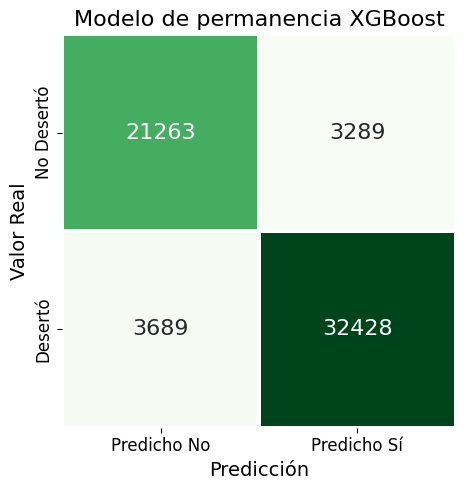

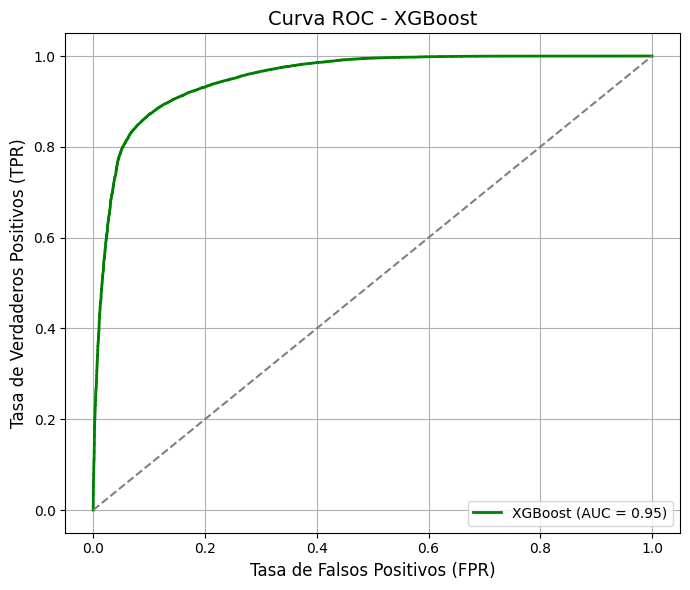

Reporte de clasificación:
              precision    recall  f1-score   support

  No Desertó     0.8522    0.8660    0.8590     24552
     Desertó     0.9079    0.8979    0.9029     36117

    accuracy                         0.8850     60669
   macro avg     0.8800    0.8819    0.8810     60669
weighted avg     0.8854    0.8850    0.8851     60669


 Métricas en conjunto de prueba (Test):

Accuracy: 0.885
F1-score: 0.9029
ROC-AUC: 0.9522
Precision: 0.9079
Recall (Sensibilidad): 0.8979
Balanced Accuracy: 0.8819
Specificity: 0.866


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_19200\1228019168.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_importances.values, y=top_importances.index, palette="Greens_r")


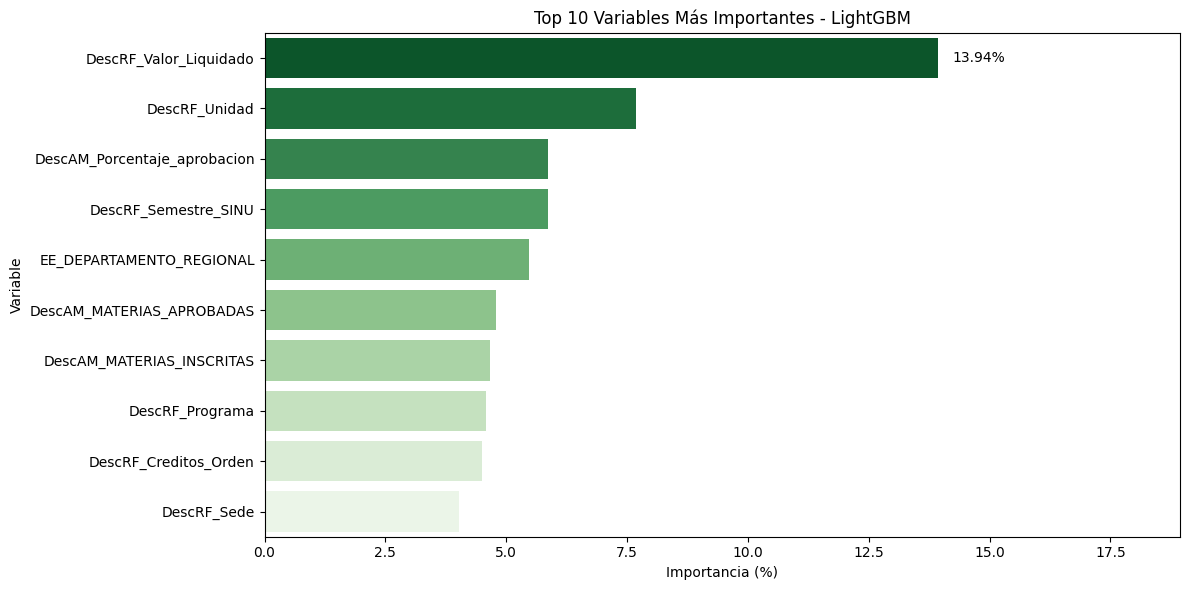

['modelo_lightgbm_desercion.pkl']

In [5]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Hiperparámetros para búsqueda aleatoria
param_dist = {
    'n_estimators': [1500], # Cantidad árboles
    'max_depth': [5, 10, 15, 20, 25, -1],  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Cuánto contribuye cada árbol al resultado
    'num_leaves': [15, 31, 63, 127], # Número máximo de hojas del árbol
    'min_child_samples': [10, 20, 30], # Mínimo número de muestras de cada hoja
    'subsample': [0.6, 0.8, 1.0],  # Proporción de filas usadas en cada iteración
    'colsample_bytree': [0.6, 0.8, 1.0]  # % De columnas usadas por árbol
}

# Búsqueda de mejores hiperparámetros con RandomizedSearchCV
search = RandomizedSearchCV(estimator=LGBMClassifier(random_state=42),
                            param_distributions=param_dist,
                            n_iter=20,
                            scoring='roc_auc',
                            cv=2,
                            random_state=42,
                            verbose=1,
                            n_jobs=-1)

search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(search.best_params_)

# Mejor modelo
modelo_lgbm = search.best_estimator_

# Predicciones
y_pred = modelo_lgbm.predict(X_test)
y_proba = modelo_lgbm.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['No Desertó', 'Desertó'], 
                     columns=['Predicho No', 'Predicho Sí'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', linewidths=1.5, linecolor='white',
            annot_kws={"size": 16}, cbar=False, square=True)

plt.title('Modelo de permanencia XGBoost', fontsize=16)
plt.ylabel('Valor Real', fontsize=14)
plt.xlabel('Predicción', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - XGBoost', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Desertó', 'Desertó'], digits = 4))

# Predicciones y probabilidades sobre el conjunto de prueba
y_pred_test = modelo_lgbm.predict(X_test)
y_proba_test = modelo_lgbm.predict_proba(X_test)[:, 1]

# Matriz de confusión para obtener la especificidad
cm_test = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm_test.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Métricas de evaluación en test
print("\n Métricas en conjunto de prueba (Test):\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_test), 4))
print("F1-score:", round(f1_score(y_test, y_pred_test), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_test), 4))
print("Precision:", round(precision_score(y_test, y_pred_test), 4))
print("Recall (Sensibilidad):", round(recall_score(y_test, y_pred_test), 4))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_test), 4))
print("Specificity:", round(specificity, 4))

# Importancia de variables 
importances = pd.Series(modelo_lgbm.feature_importances_, index=X.columns)
importances_pct = (importances / importances.sum() * 100).sort_values(ascending=False)

# Mostrar top 10
top_importances = importances_pct.head(10)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_importances.values, y=top_importances.index, palette="Greens_r")

# Agregar etiquetas
for bar in bars.containers[0]:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center', fontsize=10)

plt.title("Top 10 Variables Más Importantes - LightGBM")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.xlim(0, top_importances.values.max() + 5)
plt.tight_layout()
plt.show()


# Guardar modelo
joblib.dump(modelo_lgbm, "modelo_lightgbm_desercion.pkl")


### SHAP

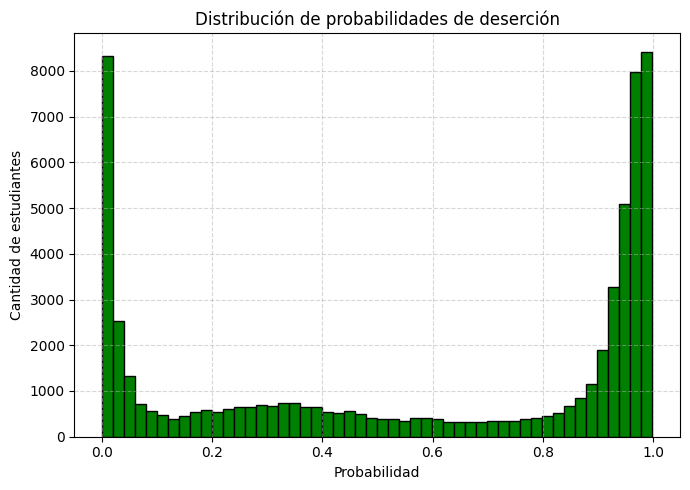

In [6]:
plt.figure(figsize=(7,5))
plt.hist(y_proba, bins=50, color="green", edgecolor="black")
plt.title("Distribución de probabilidades de deserción")
plt.xlabel("Probabilidad")
plt.ylabel("Cantidad de estudiantes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Inicializar SHAP JS
shap.initjs()

# Explicador SHAP para modelo LightGBM
explainer_lgbm = shap.TreeExplainer(modelo_lgbm)
shap_values_lgbm = explainer_lgbm.shap_values(X_test)

# Convertir a DataFrame
shap_df = pd.DataFrame(shap_values_lgbm, columns=["SHAP_" + c for c in X.columns])
df_resultado = pd.concat([df_final[["DescRF_Identificacion"]], pd.Series(y_proba, name="ProbabilidadDesercion"), shap_df], axis=1)

# TOP 3 VARIABLES SHAP
def top_3_variables(shap_row, feature_names):
    top_idx = np.argsort(np.abs(shap_row))[-3:][::-1]
    return ", ".join([f"{feature_names[i]} ({shap_row[i]:.2f})" for i in top_idx])

df_resultado["TOP_3_VARIABLES"] = shap_df.apply(lambda row: top_3_variables(row.values, shap_df.columns), axis=1)

# Estudiantes con más riesgo
top_riesgo = df_resultado.sort_values(by="ProbabilidadDesercion", ascending=False).head(5)
print("\n🎯 TOP 5 ESTUDIANTES EN RIESGO")
print(top_riesgo[["DescRF_Identificacion", "ProbabilidadDesercion", "TOP_3_VARIABLES"]])



c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(



🎯 TOP 5 ESTUDIANTES EN RIESGO
      DescRF_Identificacion  ProbabilidadDesercion  \
3101             1000254179               0.998861   
58987            1018457006               0.998794   
38267            1010176626               0.998725   
25806            1005625942               0.998682   
53285            1015450115               0.998637   

                                         TOP_3_VARIABLES  
3101   SHAP_DescRF_Unidad (1.30), SHAP_EEpromedio (1....  
58987  SHAP_DescRF_Unidad (1.28), SHAP_EEpromedio (1....  
38267  SHAP_DescRF_Unidad (1.29), SHAP_EEpromedio (1....  
25806  SHAP_DescRF_Unidad (1.33), SHAP_EEpromedio (1....  
53285  SHAP_DescRF_Unidad (1.33), SHAP_EEpromedio (1....  
